In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import emoji
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
## Loading chat data
file = open("chat.txt")

In [3]:
data = file.read()

In [4]:
## First have to split the data based on the date and time.
## I will use the regex to do so
pattern = "\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}\s.M"

In [5]:
## Finding the all messages.
message = re.split(pattern, data)[1:]
## First line is empty string

In [6]:
## Now finding the all dates and times
dates = re.findall(pattern, data)

In [7]:
## Checking the size of dates and messges
len(dates), len(message)

(984, 984)

In [8]:
## Not putting both in data frame.
df = pd.DataFrame({'date':dates, "message":message})

In [9]:
# df.shape

In [10]:
df.head()

,date,message
0,"8/10/22, 9:25 AM",- Messages and calls are end-to-end encrypted...
1,"7/21/22, 5:42 AM","- +91 6283 642 395 created group ""20BCS_WM-70..."
2,"8/10/22, 9:25 AM",- You joined using this group's invite link\n
3,"8/11/22, 6:27 PM","- GAZI Abbas Sir Java: Dear all, \nHard copy ..."
4,"8/12/22, 8:41 AM","- +91 80917 73465: Respected All,\n\nWith ref..."


In [11]:
## Converting the date columns into date times
## Cleaning the date columns
df['date'] = pd.to_datetime(df['date'].str.replace(',',''))

In [12]:
## Extracting the date and time individually
df['year'] = df['date'].dt.year

In [13]:
## Extracing the month in the form of month string.
df['month'] = df['date'].dt.month_name()

In [14]:
## Date
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [15]:
## Now splitting the sender and their message respectively
df.head()

,date,message,year,month,day,day_name,hour,minute
0,2022-08-10 09:25:00,- Messages and calls are end-to-end encrypted...,2022,August,10,Wednesday,9,25
1,2022-07-21 05:42:00,"- +91 6283 642 395 created group ""20BCS_WM-70...",2022,July,21,Thursday,5,42
2,2022-08-10 09:25:00,- You joined using this group's invite link\n,2022,August,10,Wednesday,9,25
3,2022-08-11 18:27:00,"- GAZI Abbas Sir Java: Dear all, \nHard copy ...",2022,August,11,Thursday,18,27
4,2022-08-12 08:41:00,"- +91 80917 73465: Respected All,\n\nWith ref...",2022,August,12,Friday,8,41


In [16]:
## Now splitting the message with respece to sender and their messages.
print(df['message'][3])
print(df['message'][2])
print(df['message'][40])

 - GAZI Abbas Sir Java: Dear all, 
Hard copy of Lab file is mandatory for the students having physical classes. So kindly instruct the students to maintain hard copy for Lab file. Print outs

 - You joined using this group's invite link

 - +91 70189 60040: Open with your university e-mail IDs



In [17]:
## Function to find mobile number and names
def find_sender(x):
    pattern = "^\s-\s([\w\s\d+]+):"
    res = re.search(pattern, x)
    if res == None:
        return ""
    else:
        return res[1]

In [18]:
df['sender'] = df['message'].apply(lambda x : find_sender(x))

In [19]:
## The message which have no sender means
## they are function message like, group creation, member added
## So removing such kind of message
indices = df[df['sender'] == ""].index
df.drop(indices, inplace = True)

In [20]:
## Now seperating the text from message
pattern = "^\s-\s[\w\s\d+]+:"
df['text'] = df['message'].apply(lambda x : re.split(pattern, x)[1])\
            .str.replace('\\n','').str.strip().str.lower()

/tmp/ipykernel_18789/3455867216.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('\\n','').str.strip().str.lower()


In [21]:
df.drop('message', axis=1, inplace=True)

In [22]:
df.head()

,date,year,month,day,day_name,hour,minute,sender,text
3,2022-08-11 18:27:00,2022,August,11,Thursday,18,27,GAZI Abbas Sir Java,"dear all, hard copy of lab file is mandatory f..."
4,2022-08-12 08:41:00,2022,August,12,Friday,8,41,+91 80917 73465,"respected all,with reference to the list recei..."
5,2022-08-12 08:41:00,2022,August,12,Friday,8,41,+91 80917 73465,<media omitted>
6,2022-08-12 08:41:00,2022,August,12,Friday,8,41,+91 80917 73465,if any student have not got the creditionals f...
7,2022-08-12 08:41:00,2022,August,12,Friday,8,41,+91 80917 73465,<media omitted>


In [23]:
spammer = df[(df['text'] == 'this message was deleted') | (df['text'] == 'you deleted this message')]['sender'].value_counts()

In [24]:
spammer.reset_index().rename({"index":"Sender","sender":"Frequency"}, axis=1)

,Sender,Frequency
0,+91 83508 02892,9
1,+91 6283 339 161,8
2,+91 89582 48182,7
3,+91 80917 73465,6
4,+91 96604 89963,5
5,GAZI Abbas Sir Java,3
6,+91 89670 03823,3
7,+91 89558 55533,2
8,+91 80530 54548,2
9,+91 73524 58669,2


In [25]:
spammer.iloc[:10]

+91 83508 02892        9
+91 6283 339 161       8
+91 89582 48182        7
+91 80917 73465        6
+91 96604 89963        5
GAZI Abbas Sir Java    3
+91 89670 03823        3
+91 89558 55533        2
+91 80530 54548        2
+91 73524 58669        2
Name: sender, dtype: int64

In [26]:
import function
function.busy_month(df)

year  month    
2022  August       151
      September    134
      October      113
      November     423
      December     105
dtype: int64

<BarContainer object of 10 artists>

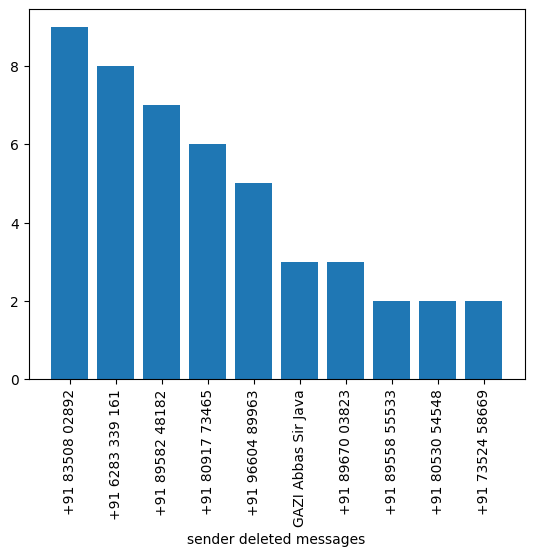

In [33]:
ten_spammer = spammer.iloc[:10]

In [34]:
ten_spammer

,Sender,Frequency
0,+91 83508 02892,9
1,+91 6283 339 161,8
2,+91 89582 48182,7
3,+91 80917 73465,6
4,+91 96604 89963,5
5,GAZI Abbas Sir Java,3
6,+91 89670 03823,3
7,+91 89558 55533,2
8,+91 80530 54548,2
9,+91 73524 58669,2
